<a href="https://colab.research.google.com/github/Asaikumarnayak/python/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


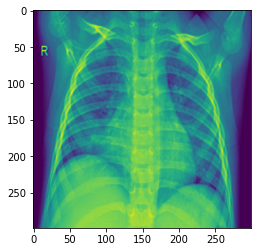

In [ ]:
img=mpimg.imread("/content/drive/MyDrive/Colab Notebooks/data sets/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1003.png")
implot=plt.imshow(img)
plt.show()#pneumonia

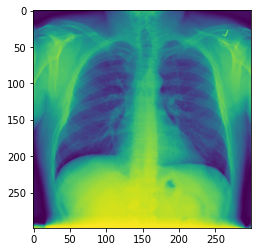

In [ ]:
img=mpimg.imread("/content/drive/MyDrive/Colab Notebooks/data sets/COVID-19_Radiography_Dataset/Normal/Normal-10.png")
implot=plt.imshow(img)
plt.show()#normal

In [ ]:
%pylab inline
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image

Populating the interactive namespace from numpy and matplotlib


In [ ]:
print(tensorflow.__version__)

2.7.0


In [ ]:
from glob import glob
import os

In [ ]:
path=r"/content/drive/MyDrive/Colab Notebooks/data sets/COVID-19_Radiography_Dataset"

In [ ]:
diag_code_dict = {
    
    'Normal': 0,
    'Viral Pneumonia': 1}
diag_title_dict = {
    
    'Normal': 'Healthy',
    'Viral Pneumonia': 'Viral Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

covidData = pd.DataFrame.from_dict(imageid_path_dict, orient = 'index').reset_index()
covidData.columns = ['image_id','path']
classes = covidData.image_id.str.split('-').str[0]
covidData['diag'] = classes
covidData['target'] = covidData['diag'].map(diag_code_dict.get) 
covidData['Class'] = covidData['diag'].map(diag_title_dict.get)

In [ ]:
samples,features = covidData.shape
duplicated = covidData.duplicated().sum()
null_values = covidData.isnull().sum().sum()

In [ ]:

print('Number of samples: %d'%(samples))
print('Number of duplicated values: %d'%(duplicated))
print('Number of Null samples: %d' % (null_values))

Number of samples: 5830
Number of duplicated values: 0
Number of Null samples: 0


In [ ]:
import seaborn as sns

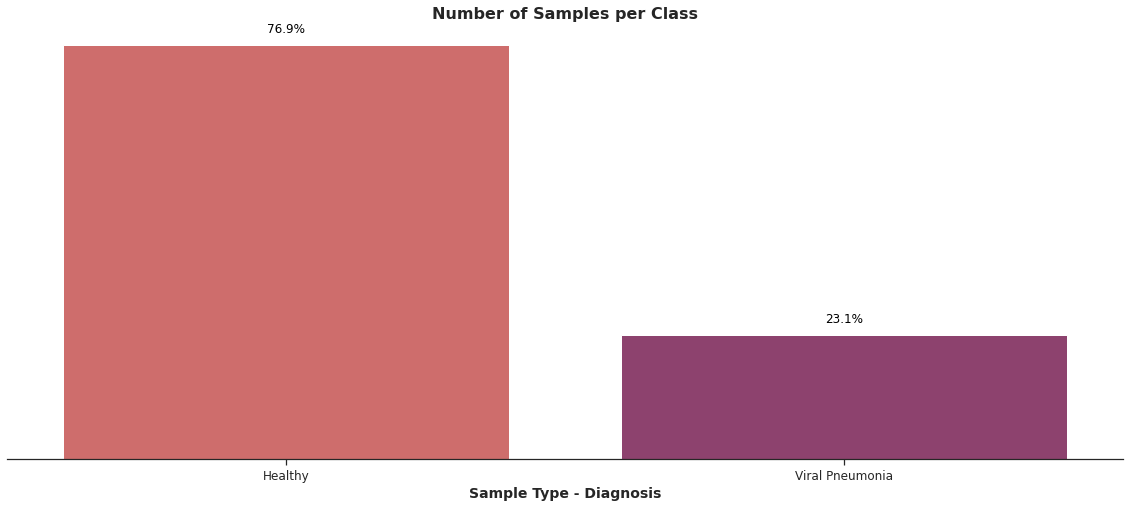

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = covidData,x='Class',order = covidData['Class'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Sample Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Samples per Class', fontsize = 16,weight = 'bold');
#Plot numbers
for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')

In [ ]:
import cv2

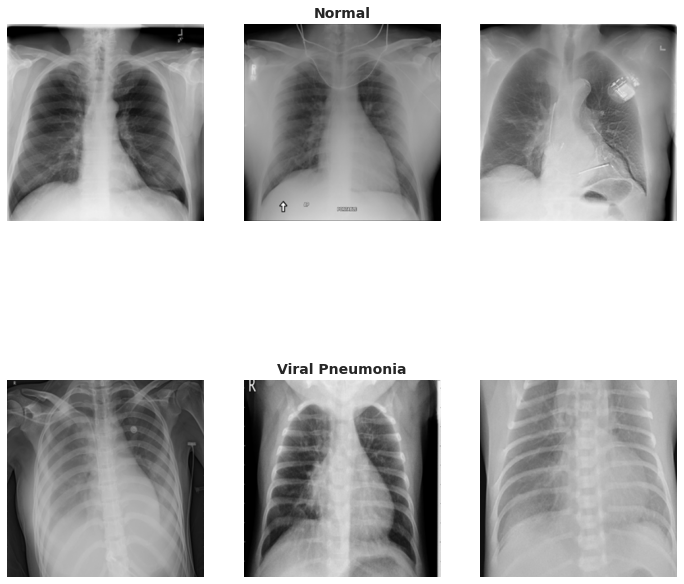

In [ ]:
n_samples = 3

fig, m_axs = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs,covidData.sort_values(['diag']).groupby('diag')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [ ]:
classes=[ "Normal", "Viral Pneumonia"]
num_classes = len(classes)
batch_size = 16

#Define the parameters to create the training and validation set Images and Data Augmentation parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

#**No Augmentation on the Test set Images**
test_datagen = ImageDataGenerator(rescale=1./255, 
                                  validation_split=0.2)

In [ ]:
#loading the images to training set
train_gen = train_datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")
#loading the images to test set
test_gen = test_datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=False, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")

Found 4664 images belonging to 2 classes.
Found 1166 images belonging to 2 classes.


In [ ]:
!pip install BatchNormalization

ERROR: Could not find a version that satisfies the requirement BatchNormalization (from versions: none)
ERROR: No matching distribution found for BatchNormalization


In [ ]:
from keras.layers import BatchNormalization

In [ ]:
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(299, 299, 1)))
model.add(BatchNormalization())
##############################
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
##############################
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [ ]:
# from keras.optimizers import Adam, SGD

In [ ]:
from keras.metrics import PrecisionAtRecall,Recall

In [ ]:
#Output
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
#Compile the model
# opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[Recall()])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

In [ ]:
#Model Parameters
epochs = 100

#Callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=0, factor=0.5, min_lr=0.00001)
early_stopping_monitor = EarlyStopping(patience=100,monitor='val_loss', mode = 'min',verbose=0)

callbacks_list = [learning_rate_reduction,early_stopping_monitor]

In [ ]:
#Verbose set to 0 to avoid Notebook visual pollution
history = model.fit(train_gen, steps_per_epoch=len(train_gen) // batch_size, 
                                validation_steps=len(test_gen) // batch_size, 
                                validation_data=test_gen, epochs=epochs,callbacks=[callbacks_list],verbose=0)
#Predict Results on test set
y_pred = model.predict(test_gen)